#### 참고 문서 
- http://www.parkjonghyuk.net/lecture/ComSec/chap08.pdf
- 정수론과 기하학은 증명을 잘 이해해야 한다고 한다.

## 최대 공약수
- Python 3.9 버전 이후 gcd에 *args를 활용할 수 있다.
- 두 자연수 a, b에 대해 $gcd(a, b) = 1$이라면 a와 b는 서로소이다.
- 분수를 통분할 때에도 쓰인다

In [1]:
import math
math.gcd(17, 19)

1

### 최소 공배수(lcm)

In [2]:
import math
def lcm(m, n) :
  return m*n//math.gcd(m,n)

lcm(17, 19)

323

### 팩토리얼

In [3]:
import math
math.factorial(10)

3628800

### n의 모든 약수 출력
- 시간복잡도 $O(n^{\frac {1}{2}})$

In [1]:
import math

def divisors(n) :
  if not n :
    return [0]
  l = []
  for i in range(1, math.isqrt(n) + 1): 
    if not n % i:
      l.append(i)
      l.append(n//i)
  return l[::2] + l[-3 if l[-1]==l[-2] else -1::-2]

### 이항 계수(Binomial Coefficient)
- 기본적으로 조합의 개수를 구하는 것과 같다.
- $n \choose k$ = $n! \over k!(n-k)!$
- `math.combination(n, k)`
- 아래는 DP 풀이
  - `(k > n//2)` 부분은 이항계수의 성질로, 앞의 절반이 뒤의 절반과 같은 성질을 이용한 것이다.

In [ ]:
def bin(n, k):
  if (k > n//2) : #이항계수의 성질
    k = n-k
  B = [0] * (k+1)
  B[0] = 1
  for i in range(1, n+1):
    j = min(i, k)
    while (j > 0):
      B[j] = B[j] + B[j-1]
      j -= 1
  return B[k]

## 모듈러 연산(합동식)
- $a \equiv b \pmod m$ : a를 m으로 나눈 나머지가 b와 같다.
  - $m | (a-b)$ : (a-b)는 m의 배수이다

### 성질과 증명
- (반사성) $a \equiv a \pmod m$ 이다.
  - $a - a = 0$이고, $m * 0 = 0$이므로 m | 0 이다. 따라서 $a \equiv a \pmod m$이다.
- (대칭성) $a \equiv b \pmod m$ 이면 $b \equiv a \pmod m$이다.
  - $a \equiv b \pmod m$이므로 $m | (a-b)$이다. 또한 $m | (a-b)$ 이므로 $m | (b-a)$이다. 따라서 $b \equiv a \pmod m$이다.
- (추이성) $a \equiv b \pmod m$ 이고 $b \equiv c \pmod m$이면 $a \equiv c \pmod m$이다.
  - $a \equiv b \pmod m$이므로 $m | (a-b)$이다. 또한 $b \equiv c \pmod m$이므로 $m | (b-c)$이다. 따라서 $m | (a-b) + (b-c)$이므로, $m | (a-c)$이다. 따라서 $a \equiv c \pmod m$이다.
- $A \equiv B \pmod m$ 이고 $C \equiv D \pmod m$ 이면 
  - $A±C \equiv B±D \pmod m$ (복부호동순)
  - $AC \equiv BD \pmod m$
- $A \equiv B \pmod m$ 이면 $A^k \equiv B^k \pmod m$


### 모듈러 연산의 분배법칙
- $(a ± b) \mod p = (a \mod p ± b \mod p) \mod p$ (복부호동순)
  - 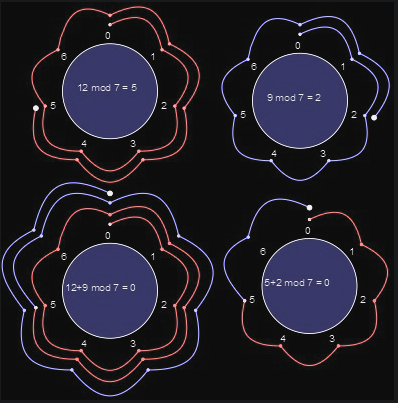
  - $12 + 9 \mod 7$을 계산한다고 했을 때, 모듈러 원을 시계방향으로 12+9번 더한 것과 같다고 할 수 있다.
- $(a * b) \mod p = (a \mod p * b \mod p) \mod p$
- $(a / b) \mod p = (a * b^{p-2}) \mod p = (a \mod p * b^{p-2} \mod p) \mod p$ (페르마의 소정리)
  - $b^{p-2}$는 $b$의 모듈러 역원이다.

### 모듈러 연산의 곱셈
- $(a * b) \mod p = (a \mod p * b \mod p) \mod p$

### 분할정복을 이용한 거듭 제곱
- $A^{X * Y}$ = $(A^X)^Y$ 인 성질을 이용해서 거듭제곱을 최적화할 수 있다.
- $A^B$를 구할 때, B가 짝수이면 $A^{\frac {B}{2}} * A^{\frac {B}{2}}$로 분할하여 계산한다.
  - 예를들어 $A^4$ = $(A^2)^2$로 계산할 수 있다.
- $A^B$를 구할 때, B가 홀수이면 $A^{\frac {B-1}{2}} * A^{\frac {B-1}{2}} * A$로 분할하여 계산한다.
  - 예를들어 $A^5$ = $(A^2)^2 * A$로 계산할 수 있다.
- 이를 이용해 N번의 연산을 하는 O(N)을 $O(logN)$으로 줄일 수 있다.

In [12]:
A = 123
B = 345
C = 1234567891

dp = [A%C]
X = 1
for b in range(B.bit_length()) :
  x = dp[-1]
  dp.append(x**2 % C)
  if B & (1<<b) : 
    X *= x
X % C

460233705

### $A^B mod C$ 구하기
- Python에선 별다른 구현 없이 해당 값을 구할 수 있다.

In [13]:
A = 123
B = 345
C = 1234567891
pow(A, B, C)

460233705

### $nCr \mod p$

In [ ]:
def gnCr(max_n=2 * 10**5, mod=10**9 + 7):
  max_n = min(max_n, mod - 1)

  fact, inv_fact = [0] * (max_n + 1), [0] * (max_n + 1)
  fact[0] = 1
  for i in range(max_n):
    fact[i + 1] = fact[i] * (i + 1) % mod

  inv_fact[-1] = pow(fact[-1], mod - 2, mod)
  for i in reversed(range(max_n)):
    inv_fact[i] = inv_fact[i + 1] * (i + 1) % mod

  def nCr_mod(n, r):
    res = 1
    while n or r:
      a, b = n % mod, r % mod
      if a < b:
        return 0
      res = res * fact[a] % mod * inv_fact[b] % mod * inv_fact[a - b] % mod
      n //= mod
      r //= mod
    return res

  return nCr_mod